<a href="https://colab.research.google.com/github/diogenesjusto/covid-19/blob/master/Grupo3_Estados_Noroeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTANDO BIBLIOTECAS E DATASET

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')

In [0]:
df.head()

,date,country,state,city,deaths,newCases,totalCases
0,2020-02-25,Brazil,SP,TOTAL,0,1,1
1,2020-02-25,Brazil,TOTAL,TOTAL,0,1,1
2,2020-02-29,Brazil,SP,TOTAL,0,1,2
3,2020-02-29,Brazil,TOTAL,TOTAL,0,1,2
4,2020-03-04,Brazil,SP,TOTAL,0,1,3


# FILTRANDO OS DADOS DOS ESTADOS

In [0]:
df.state.unique()

array(['SP', 'TOTAL', 'ES', 'RJ', 'BA', 'DF', 'AL', 'MG', 'RS', 'GO',
       'PE', 'PR', 'RN', 'SC', 'AM', 'MS', 'SE', 'CE', 'AC', 'PA', 'PB',
       'TO', 'PI', 'RO', 'AP', 'MA', 'MT', 'RR'], dtype=object)

In [0]:
df_filtrados = df.query("state in ['CE', 'AM', 'DF', 'BA', 'PE', 'RN', 'MA', 'SP', 'RJ', 'MG', 'ES', 'RS', 'SC', 'PR']")

In [0]:
df_filtrados.state.unique()

array(['SP', 'ES', 'RJ', 'BA', 'DF', 'MG', 'RS', 'PE', 'PR', 'RN', 'SC',
       'AM', 'CE', 'MA'], dtype=object)

# CRIANDO O DATASET TRATADO

In [0]:
estados = ['CE', 'AM', 'DF', 'BA', 'PE', 'RN', 'MA', 'SP', 'RJ', 'MG', 'ES', 'RS', 'SC', 'PR']
novo_df = pd.DataFrame()

for estado in estados:    
    df_estado = df_filtrados.loc[df_filtrados.state == estado, : ]
    df_estado = df_estado.drop(columns=['country', 'city', 'deaths', 'newCases', 'date', 'state'])
    df_estado = df_estado.query('totalCases >= 20').reset_index()
    df_estado = df_estado.drop(columns='index')
    df_estado.columns = [estado]
    qtd_dias = df_estado[estado].count()
    

    dias = list(range(qtd_dias,20))

    for dia in dias:
     df_estado.loc[dia] = [0]

    
    novo_df = pd.concat([novo_df, df_estado], ignore_index=False, axis=1)

novo_df

,CE,AM,DF,BA,PE,RN,MA,SP,RJ,MG,ES,RS,SC,PR
0,20.0,26.0,26.0,27.0,22.0,28.0,22.0,45,24.0,20.0,26.0,28.0,22.0,23.0
1,25.0,32.0,36.0,31.0,28.0,45.0,22.0,64,24.0,29.0,26.0,37.0,41.0,36.0
2,68.0,47.0,84.0,34.0,31.0,68.0,31.0,64,31.0,38.0,33.0,60.0,58.0,43.0
3,84.0,54.0,108.0,41.0,33.0,77.0,52.0,65,39.0,55.0,39.0,72.0,69.0,54.0
4,125.0,67.0,112.0,55.0,37.0,83.0,71.0,136,63.0,83.0,39.0,85.0,87.0,60.0
5,164.0,81.0,134.0,63.0,42.0,92.0,81.0,152,66.0,128.0,47.0,96.0,110.0,69.0
6,185.0,111.0,146.0,79.0,42.0,106.0,81.0,164,109.0,130.0,53.0,113.0,122.0,97.0
7,211.0,140.0,177.0,91.0,46.0,176.0,96.0,244,119.0,133.0,60.0,162.0,149.0,106.0
8,238.0,151.0,195.0,108.0,48.0,215.0,133.0,287,186.0,148.0,71.0,190.0,163.0,125.0
9,282.0,175.0,203.0,122.0,57.0,242.0,172.0,396,231.0,189.0,84.0,197.0,184.0,137.0


# PLOTANDO GRÁFICOS

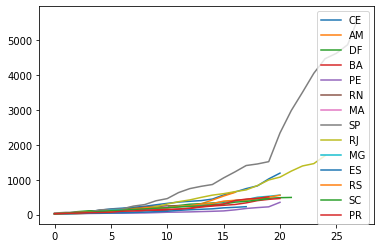

In [0]:
novo_df.replace(0, np.nan, inplace=True)
novo_df.plot()

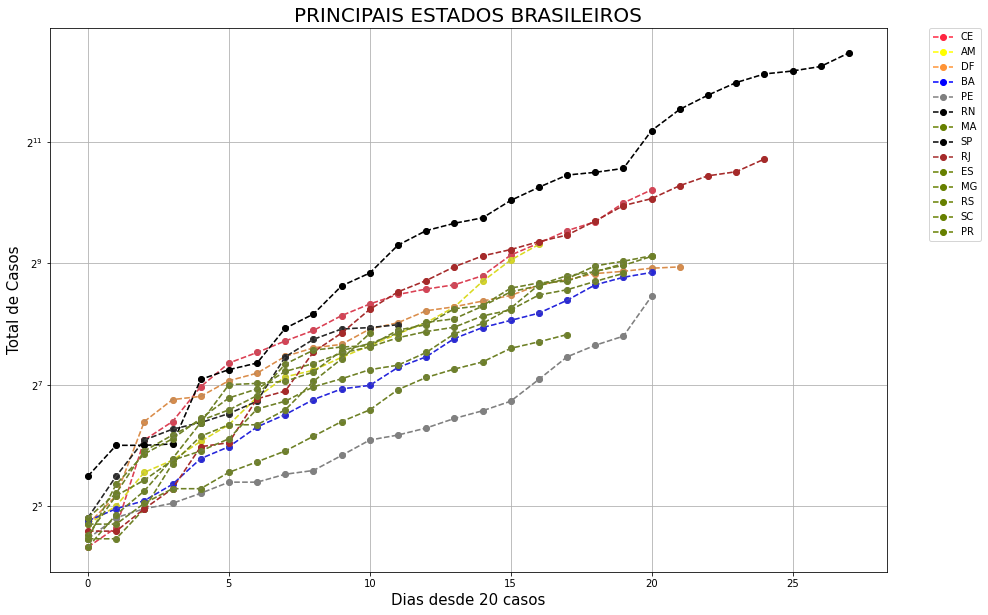

In [0]:
plt.figure(figsize=(15, 10))
plt.plot(novo_df.CE, 'o--', label='CE', color='#FF2641')
plt.plot(novo_df.CE,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.AM,'o--', label='AM', color='yellow')
plt.plot(novo_df.AM,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.DF, 'o--',label='DF', color='#FF9436')
plt.plot(novo_df.DF,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.BA,'o--', label='BA', color='blue')
plt.plot(novo_df.BA,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.PE, 'o--',label='PE', color='grey')
plt.plot(novo_df.PE,'o--',  color='grey', alpha=0.3)
plt.plot(novo_df.RN,'o--', label='RN', color='black')
plt.plot(novo_df.RN,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.MA, 'o--',label='MA', color='#668000')
plt.plot(novo_df.MA,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.SP, 'o--',label='SP', color='black')
plt.plot(novo_df.SP,'o--', color='black', alpha=0.3)
plt.plot(novo_df.RJ, 'o--',label='RJ', color='brown')
plt.plot(novo_df.RJ,'o--', color='brown', alpha=0.3)
plt.plot(novo_df.ES, 'o--',label='ES', color='#668000')
plt.plot(novo_df.ES,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.MG, 'o--',label='MG', color='#668000')
plt.plot(novo_df.MG,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.RS, 'o--',label='RS', color='#668000')
plt.plot(novo_df.RS,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.SC, 'o--',label='SC', color='#668000')
plt.plot(novo_df.SC,'o--', color='grey', alpha=0.3)
plt.plot(novo_df.PR, 'o--',label='PR', color='#668000')
plt.plot(novo_df.PR,'o--', color='grey', alpha=0.3)

plt.yscale('log', basey=2)
plt.title('PRINCIPAIS ESTADOS BRASILEIROS', fontsize=20)
plt.grid(True)
plt.xlabel('Dias desde 20 casos', fontsize=15)
plt.ylabel('Total de Casos', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Gerando CSV para equipe de **DATA-VIZ**

In [0]:
df_filtrados = df_filtrados[['date', 'state', 'city', 'totalCases']]
df_filtrados.columns = ['Data', 'Estado', 'Cidade', 'Casos']
df_filtrados

,Data,Estado,Cidade,Casos
10,2020-03-06,BA,TOTAL,1
15,2020-03-07,BA,TOTAL,2
16,2020-03-07,DF,TOTAL,1
22,2020-03-08,BA,TOTAL,2
23,2020-03-08,DF,TOTAL,1
...,...,...,...,...
710,2020-04-07,CE,TOTAL,1138
711,2020-04-07,DF,TOTAL,492
714,2020-04-07,MA,TOTAL,204
720,2020-04-07,PE,TOTAL,352


In [0]:
from google.colab import drive
drive.mount('drive')
df_filtrados.to_csv('estados_nordeste.csv', index=False)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
